<center><img src="https://is1-ssl.mzstatic.com/image/thumb/Purple122/v4/05/e7/67/05e76784-3364-b535-7e20-b3f4946a56b6/AppIcon-0-0-1x_U007emarketing-0-0-0-7-0-0-sRGB-0-0-0-GLES2_U002c0-512MB-85-220-0-0.png/434x0w.webp" style="height:150px"></center>

<hr style="border-width:2px;border-color:red">
<center><h1>Test Technique Data Scientist</h1></center>
<center><h2> Mesure de la dérive </h2></center>
<hr style="border-width:2px;border-color:red">

# Contexte

La **dérive** en apprentissage automatique (ou **"drift"** en anglais) fait référence à un **changement dans les données d'entrée ou de sortie d'un modèle** de machine learning **après son entraînement initial**. Cela peut se produire lorsque les données utilisées pour entraîner le modèle ne **reflètent plus la réalité**, ou lorsque **les conditions du problème changent de manière significative**.

La dérive des données peut affecter la précision du modèle de manière significative et peut entraîner des erreurs coûteuses dans les prévisions ou les décisions basées sur le modèle. Par conséquent, **il est important de surveiller régulièrement les performances du modèle** et de le mettre à jour en fonction des nouveaux jeux de données ou des nouvelles conditions du problème.

# Objectif

Dans ce test, vous allez implémenter des métriques permettant de mesurer la dérive d'un modèle dans un usecase de **e-commerce** où nous essayons de prédire le **panier total** (variable **`TotalCart`** : chiffre d'affaire total d'un client sur la période donnée) des clients en fonction des variables suivantes:
* **`Age`** : âge du client en années.
* **`Seniority`** : ancienneté du client en années.
* **`Orders`** : Nombre de commandes effectuées sur la période précédente.
* **`Items`** : Nombre d'items commandés sur la période précédente.
* **`AverageDiscount`** : Réduction moyenne accordée au client sur la période précédente en pourcentage.
* **`TopCategory`** : Catégorie de produits favorite du client.
* **`BrowsingTime`** : Temps total passé sur le site web sur la période précédente en secondes.
* **`EmailsOpened`** : Nombre de mails marketing ouverts par le client sur la période précédente.
* **`SupportInteractions`** : Nombre d'interactions que le client a eu avec le service client sur la période précédente.

Le jeu de données est décomposé en 4 périodes correspondant aux 4 trimestres de l'année 2022. Vous trouverez les données correspondant à chaque période dans les fichiers **`period_0.csv`**, **`period_1.csv`**, ..., **`period_3.csv`**.

Vous allez d'abord **entraîner et évaluer un modèle de machine learning** sur les données de la **période 0**. On supposera que ce modèle sera utilisé pour effectuer les prédictions de panier total sur toute l'année 2022.

Ensuite, vous devrez **implémenter des métriques de dérive** qui vous seront données et **effectuer une analyse** de celle-ci.

# Entraînement du modèle

* **Entraînez et validez** deux ou trois modèles de votre choix sur les données de la période 0. 

**Conseils**

* Vous serez évalué sur votre **rigueur** et non sur les performances du modèle.


* Il n'est pas nécessaire de faire une analyse exploratoire des données.


* Il n'est pas nécessaire de faire de recherche d'hyperparamètres optimaux non plus mais vous pouvez le faire si vous le souhaitez.

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

def load_data(i):
    return pd.read_csv(f'period_{i}.csv')

def split_data(df):
    X = df.drop(["TotalCart"], axis=1)
    X = pd.get_dummies(X, columns=["TopCategory"])
    y = df["TotalCart"]
    return X, y

def standardize(X_train, X_val):
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_val = scaler.transform(X_val)
    return X_train, X_val

def train_model(model, X_train, y_train):
    model.fit(X_train, y_train)
    return model

def evaluate_model(model, X_val, y_val):
    score = model.score(X_val, y_val)
    predictions = model.predict(X_val)
    mse = mean_squared_error(y_val, predictions)
    return score, mse

# chargement les données
df = load_data(0)

# diviser les données en features et target variable
X, y = split_data(df)

# diviser les données en training et validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# normaliser les features
X_train, X_val = standardize(X_train, X_val)

# train and validate models
models = [LinearRegression(), RandomForestRegressor(n_estimators=100, random_state=42), MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=500, random_state=42)]
model_scores = [evaluate_model(train_model(model, X_train, y_train), X_val, y_val) for model in models]

# print results
model_names = ["Linear Regression", "Neural Network", "Random Forest"]
for i, name in enumerate(model_names):
    print(name + " score:", model_scores[i][0], name + " MSE:", model_scores[i][1])


Linear Regression score: 0.9211405142823338 Linear Regression MSE: 19.100838887104977
Neural Network score: 0.9812039855260799 Neural Network MSE: 4.552650082849997
Random Forest score: 0.9264861699922575 Random Forest MSE: 17.806048443926713


C:\Users\cyril\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


* **Entrainez votre modèle sur toute la période 0** puis **testez votre modèle** sur les données des **périodes 1, 2 et 3**. Comment évolue la performance du modèle?

In [3]:
def predict_and_score(model, X_test, y_test):
    y_pred = model.predict(X_test)
    score = model.score(X_test, y_test)
    mse = mean_squared_error(y_test, y_pred)
    return y_pred, score, mse

# Chargement des données
periods = [load_data(i) for i in range(4)]

# Entraînement du modèle sur la période 0
X_train, y_train = split_data(periods[0])
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

# Prédictions et calcul de la MSE et du score pour chaque période
for i in range(1, 4):
    X_test, y_test = split_data(periods[i])
    y_pred, score, mse = predict_and_score(model, X_test, y_test)
    print(f"Période {i} - MSE: {mse} - R²: {score}")


Période 1 - MSE: 65.03984964020009 - R²: 0.8158413519261337
Période 2 - MSE: 78.7848166394901 - R²: 0.7941801724739599
Période 3 - MSE: 165.37748324047018 - R²: 0.6975953547530511


#### Interpretation
D'après ces résultats, il semble que la performance des modèles diminue au fil du temps. En effet, le score R² et le MSE sont relativement élevés pour la période 1, mais ils diminuent pour les périodes 2 et 3. Cela peut suggérer que les données des périodes 2 et 3 sont significativement différentes de celles de la période 0, ce qui rendrait les modèles moins performants

# Mesure de la dérive de variables catégorielles.

Pour deux distributions de probabilités discrètes $P$ et $Q$, la **divergence de Kullback–Leibler** de $P$ par rapport à $Q$ est définie par:

$$D_\text{KL}(P \parallel Q) = \sum_{x\in\mathcal{X}} P(x) \log\left(\frac{P(x)}{Q(x)}\right)$$


On définit la **divergence de Jensen-Shannon** comme une version lisse et symétrique de la divergence de Kullback-Leiber donnée par la formule suivante:

$${\rm JSD}(P \parallel Q)= \frac{1}{2}D(P \parallel M)+\frac{1}{2}D(Q \parallel M)$$

où $M=\frac{1}{2}(P+Q)$

### Exemple de calcul de $D_\text{KL}(P \parallel Q)$ : 

Soient $P$ =`[0.2, 0.3, 0.5]` et $Q$ =`[0.2, 0.4, 0.4]` deux vecteurs définissant une loi de probabilité discrete. Alors : 

$$
\begin{equation}
\begin{split}
D_\text{KL}(P \parallel Q) & = P(0) \log\left(\frac{P(0)}{Q(0)}\right)
                             + P(1) \log\left(\frac{P(1)}{Q(1)}\right)
                             + P(2) \log\left(\frac{P(2)}{Q(2)}\right)\\ \\
                           & = 0.2 \log\left(\frac{0.2}{0.2}\right)
                             + 0.3 \log\left(\frac{0.3}{0.4}\right)
                             + 0.5 \log\left(\frac{0.5}{0.4}\right) \\ \\
                           & = 0.02526...
\end{split}
\end{equation}
$$

### Exercice

* Implémenter des fonctions nommées **`KLDivergence(P, Q)`** et **`JSDivergence(P, Q)`** permettant de calculer les métriques définies ci-dessus.

**Conseils**:
* Utiliser la librairie Numpy permettant de facilement effectuer des calculs d'algèbre linéaire.

In [4]:
import numpy as np 

P = np.array([0.2, 0.3, 0.5])
Q = np.array([0.2, 0.4, 0.4])

def KLDivergence(P, Q):
    """Calcule la divergence de Kullback-Leibler entre les distributions de probabilités discrètes P et Q."""
    return np.sum(P * np.log(P / Q))

def JSDivergence(P, Q):
    """Calcule la divergence de Jensen-Shannon entre les distributions de probabilités discrètes P et Q."""
    M = 0.5 * (P + Q)
    return 0.5 * KLDivergence(P, M) + 0.5 * KLDivergence(Q, M)

    

* Lancer la cellule suivante pour tester votre fonction.

In [5]:
print("K-L Divergence:", KLDivergence(P, Q))
print("J-S Divergence:", JSDivergence(P, Q))

K-L Divergence: 0.02526715392157057
J-S Divergence: 0.006367198333995731


# Mesure de la dérive de variables quantitatives.

Soit $P$ une mesure empirique d'échantillons $X_1, \ldots, X_n
$ et $Q$ une mesure empirique d'échantillons $Y_1, \ldots, Y_n$, on définit la **Distance de Wasserstein** d'ordre $p$ par la fonction suivante :

$$W_p(P, Q) = \left( \frac{1}{n}\sum_{i=1}^n \|X_{(i)} - Y_{(i)}\|^p \right)^{1/p}$$

où $X_{(1)}, \ldots, X_{(n)}$ et $Y_{(1)}, \ldots, Y_{(n)}$ sont les [**statistiques d'ordre**](https://en.wikipedia.org/wiki/Order_statistic#Notation_and_examples) des échantillons $X$ et $Y$ et $p$ un nombre entier positif.

### Exercice

* Implémenter une fonction nommée **`WassersteinDistance(X, Y, p)`** permettant de calculer cette métrique à l'ordre **`p`** à partir de **deux échantillons** **`X`** et **`Y`** que l'on supposera de même longueur.

**Conseils**:
* Vous pouvez trier les échantillons pour obtenir les statistiques d'ordre.

In [6]:
def WassersteinDistance(X, Y, p):
    n = len(X)
    X_order = np.sort(X)
    Y_order = np.sort(Y)
    return np.power(np.mean(np.power(np.abs( X_order - Y_order), p)), 1.0 / p)
    

* Lancer la cellule suivante pour tester votre fonction.

In [7]:
X = np.random.beta(2, 6, 100)

Y = np.random.beta(3, 6, 100)

WassersteinDistance(X, Y, 2)

0.09954432361001743

# Étude de la dérive du modèle.

* En vous appuyant sur les métriques définies précédemment, illustrez et analysez visuellement la **dérive des données** ainsi que **la dérive du modèle** sur les périodes **1 à 3**. 


* Commenter les visualisations et déterminer si le modèle doit être mis à jour ou si sa performance est toujours acceptable. 

**Conseils**:
* Vous serez évalué sur **la rigueur et le soin** que vous donnerez à votre analyse, et sur **vos capacités à synthéthiser votre étude**. Vous ne serez pas évalué sur vos conclusions.


* Vous pouvez normaliser les données par rapport aux **moyennes et variances que vous calculerez sur la période 0** pour que les distances de Wasserstein pour différentes variables soient facilement comparables.

### Introduction
Dans le contexte de cet exercice, la dérive des données se produit si les données collectées dans les périodes 1 à 3 ont des caractéristiques différentes de celles collectées dans la période 0, utilisée pour entraîner le modèle. La dérive du modèle se produit si le modèle ne parvient pas à s'adapter aux nouvelles données collectées dans les périodes 1 à 3.

## 1 - dérive des données

### a) Variable catégorielle

C:\Users\cyril\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3417: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\cyril\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3558: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


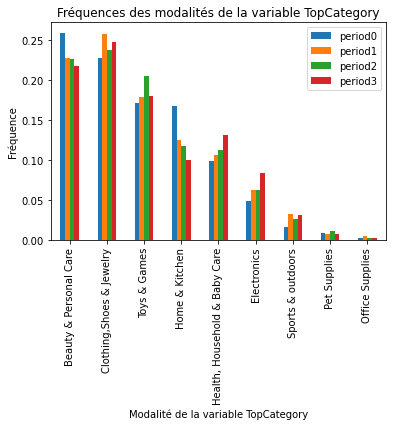

In [8]:
import matplotlib.pyplot as plt

period0 = pd.read_csv('period_0.csv')
mean_period0 = np.mean(period0, axis=0)
std_period0 = np.std(period0, axis=0)

def load_data_cat(period):
    return pd.read_csv(f'period_{period}.csv')['TopCategory']

def get_freq(data):
    return data.value_counts(normalize=True)

# Fréquences des modalités de la seule variable categorielle TopCategory pour chaque période
periods_data = [load_data_cat(period) for period in range(4)]
freq_periods = [get_freq(data) for data in periods_data]

freq_df = pd.concat(freq_periods, axis=1, keys=['period0', 'period1', 'period2', 'period3'])

# Graphique à barres des fréquences par période
freq_df.plot(kind='bar')
plt.title('Fréquences des modalités de la variable TopCategory')
plt.xlabel('Modalité de la variable TopCategory')
plt.ylabel('Fréquence')
plt.show()


### Interprétation
On constate que pour la variable catégorielle (TopCategory), les fréquences des modalités pour les périodes de 1 à 3 diffèrent considérablement de celles de la période 0. Ce sont des signes de dérive des données.

### b) Variables quantitatives

C:\Users\cyril\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3417: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\cyril\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3558: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


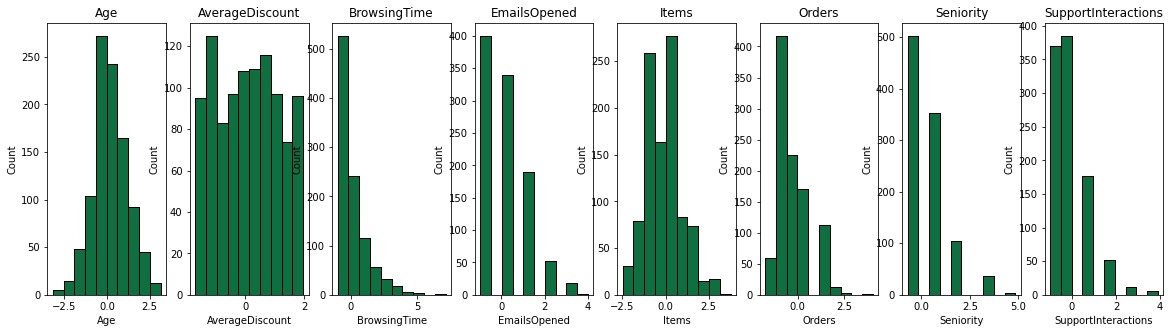

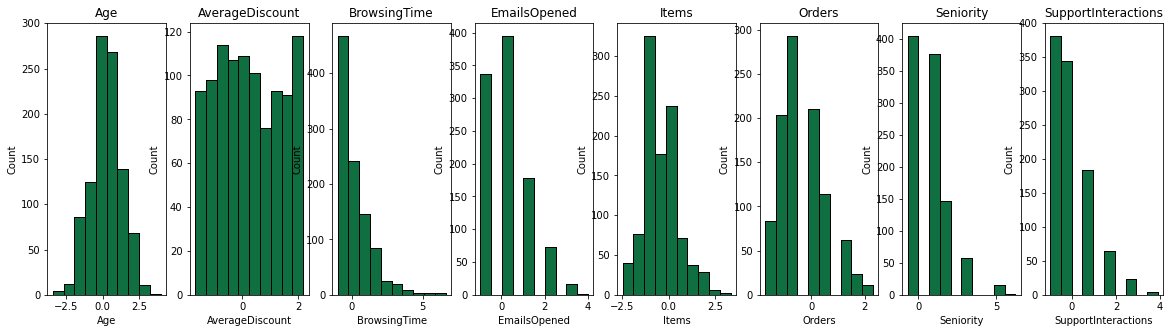

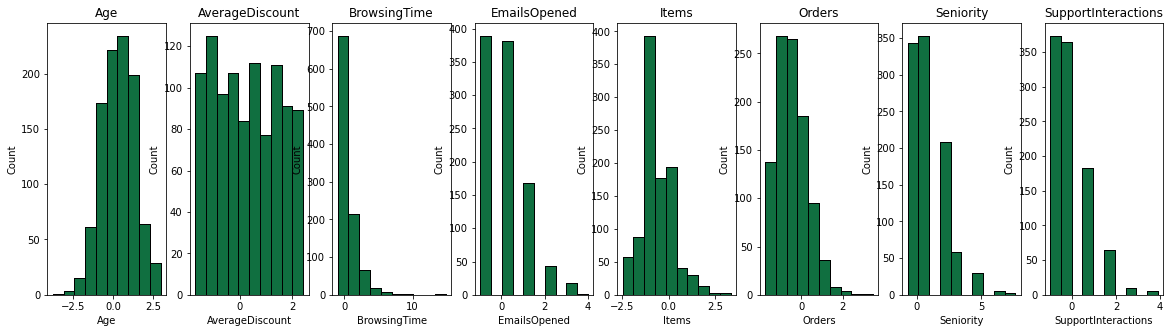

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

period0 = pd.read_csv('period_0.csv')
mean_period0 = np.mean(period0, axis=0)
std_period0 = np.std(period0, axis=0)

def load_data_quant(period):
    data_period = ((pd.read_csv(f'period_{i}.csv') - mean_period0) / std_period0).drop(['TotalCart'], axis=1)
    return data_period.select_dtypes(include=np.number), data_period

def plot_histograms(period, colors=['blue', 'green'], num_bins=10, figsize=(20,5)):
    fig, axs = plt.subplots(nrows=1, ncols=len(load_data_quant(0)[0].columns), figsize=figsize)
    for i, col in enumerate(load_data_quant(0)[0].columns):
        sns.histplot(data=load_data_quant(0)[0], x=col, bins=num_bins, color=colors[0], ax=axs[i])
        sns.histplot(data=load_data_quant(period)[0], x=col, bins=num_bins, color=colors[1], ax=axs[i])
        axs[i].set_title(col)

for i in range(1, 4):
    plot_histograms(i)
plt.show()

### Interprétation
les distributions des variables quantitatives se supperposent toutes. Les variables quantitatives n'ont aucun impact dans la dérive des données.

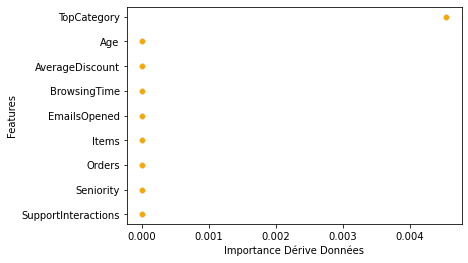

In [59]:
import numpy as np
import pandas as pd
import seaborn as sns


def feature_drift_importance(i):
    # Charger les données de la période initiale et de la période comparée
    data_initial = load_data_quant(0)[1].select_dtypes(include=np.number)
    data_comparison =load_data_quant(i)[1].select_dtypes(include=np.number)

    drift_importance = {}
    
    # Calcul de la dérive de la variable catégorielle
    drift_importance["TopCategory"] = JSDivergence(get_freq(load_data_cat(0)), get_freq(load_data_cat(1)))
    
    #Calculer la distance de Wasserstein pour chaque variable numérique entre la période initiale et la période comparée
    for col in data_initial.columns: 
        drift_importance[col] = WassersteinDistance(data_initial[col], data_comparison[col], 2)

    # Classement des variables en fonction de leur niveau de dérive 
    drift_importance = sorted(drift_importance.items(), key=lambda x: x[1], reverse=True)

    # Dataframe pour visualiser l'importance de la dérive de caractéristiques
    drift_df = pd.DataFrame(drift_importance, columns=['Features', 'Importance Dérive Données'])
    return drift_importance, drift_df

# Nuage de points pour visualiser l'importance de la dérive de chaque variable à chaque période
colors=['blue', 'green', 'orange']
plt.figure()
for i in range(3):
    drift_df = pd.DataFrame(feature_drift_importance(i+1)[0], columns=['Features', 'Importance Dérive Données'])
    sns.scatterplot(x='Importance Dérive Données', y='Features', data=feature_drift_importance(i+1)[1], color=colors[i])
plt.show()

### Interprétation
La variable categorielle a une dérive considérable par rapport aux autres variables. Pour conclure sur l'eventuel dérive des données, il faut étudier l'impact de la variable TopCategory sur la target, determiner si elle est significativement associée à la variable cible TotalCart.

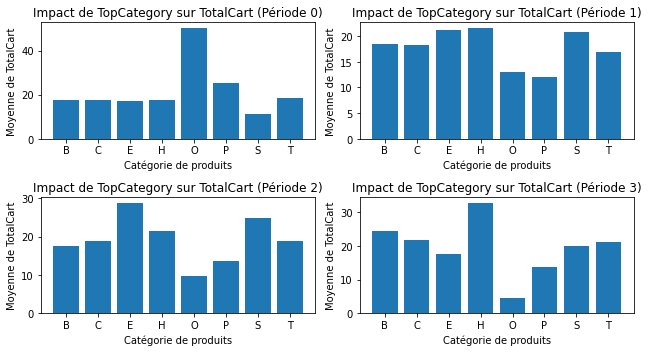

In [60]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(9, 5))
# Pour chaque période
for i in range(4):
    # Charger les données dans un dataframe
    df = pd.read_csv(f'period_{i}.csv')
    
    # Calcul de la moyenne de TotalCart pour chaque catégorie de produits dans TopCategory
    means = df.groupby('TopCategory')['TotalCart'].mean()
    std = df.groupby('TopCategory')['TotalCart'].std()
    new_index = [cat[0] for cat in means.index]
    std.index = new_index
    
    # Graphique en barres
    row = i // 2
    col = i % 2
    axs[row, col].bar(std.index, std.values)
    axs[row, col].set_xlabel('Catégorie de produits')
    axs[row, col].set_ylabel('Moyenne de TotalCart')
    axs[row, col].set_title(f'Impact de TopCategory sur TotalCart (Période {i})')

plt.tight_layout()
plt.show()


### Conclusion partielle
Les barres d'erreur ne se chevauchent pas, cela  indique une différence significative entre les catégories de produits.L'impact de la variable TopCategory est considérable: Il y'a dérive de données.

## 2 - derive du modèle

Période 0 - MSE: 4.552650082849997 R²: 0.9812039855260799 Distance de Wasserstein: 1.028883036525532
Période 1 - MSE: 8196.123877527505 R²: -22.20711227165065 Distance de Wasserstein: 90.15763809514702
Période 2 - MSE: 8490.485585320246 R²: -21.180800226766284 Distance de Wasserstein: 91.82210421047999
Période 3 - MSE: 9158.737603623904 R²: -15.747411689090256 Distance de Wasserstein: 95.42954032349681


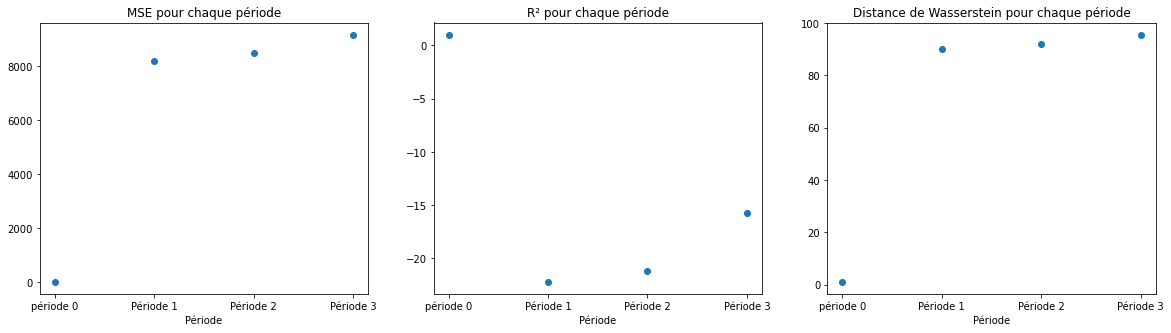

In [54]:

import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

# Prédictions pour la période 0 et calculer la distance de Wasserstein
y_pred_0 = models[1].predict(X_val)
wasserstein_period_0 = WassersteinDistance(y_val, y_pred_0, 2)

# Fonction pour obtenir les métriques de performance pour chaque période
def Prédictions_métriques_de_performance(i):
    # Séparer les données en données d'entrainement et de test pour la période i
    X_test, y_test = split_data(periods[i])
    # Obtenir les prédictions avec le modèle entraîné sur la période 0
    y_pred = models[1].predict(X_test)
    # Calculer la MSE, R² et la distance de Wasserstein entre les vraies valeurs et les prédictions
    mse_period = mean_squared_error(y_test, y_pred)
    r2_period = r2_score(y_test, y_pred)
    wasserstein_period = WassersteinDistance(y_test, y_pred, 2)
    return mse_period, r2_period, wasserstein_period

# Afficher les métriques de performance pour la période 0
print(f"Période 0 - MSE:", mean_squared_error(y_val, y_pred_0), "R²:", r2_score(y_val, y_pred_0), "Distance de Wasserstein:", WassersteinDistance(y_val, y_pred_0, 2))

# Afficher les métriques de performance pour les périodes 1 à 3
for i in range(1, 4):
    metriques_results = Prédictions_métriques_de_performance(i)
    print(f"Période {i} - MSE:", metriques_results[0], "R²:", metriques_results[1], "Distance de Wasserstein:", metriques_results[2])

# Obtenir les scores pour chaque période
mse_scores = [mean_squared_error(y_val, y_pred_0)] + [Prédictions_métriques_de_performance(i)[0] for i in range(1, 4)]
r2_scores = [r2_score(y_val, y_pred_0)] + [Prédictions_métriques_de_performance(i)[1] for i in range(1, 4)]
wd_scores = [WassersteinDistance(y_val, y_pred_0, 2)] + [Prédictions_métriques_de_performance(i)[2] for i in range(1, 4)]
period_names = ['période 0','Période 1', 'Période 2', 'Période 3']

# Tracer les graphiques pour chaque métrique de performance
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
metric_names = ['MSE', 'R²', 'Distance de Wasserstein']
for scores, ax, metric_name in zip([mse_scores, r2_scores, wd_scores], axs, metric_names):
    ax.scatter(period_names, scores)
    ax.set_title(metric_name + ' pour chaque période')
    ax.set_xlabel('Période')
    ax.set_ylabel


### Interprétation
Les performances du modèle diminue avec la période. Le modèle est de moins en moins performant: Il y'a dérive du modèle

###  Conclusion
La dérive des données(qui conduirait à celle du modèle) et celle du modèle montre clairement que sa performance n'est plus acceptable: il doit être mis à jour.